In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

/opt/anaconda3/envs/Titanic/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/envs/Titanic/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


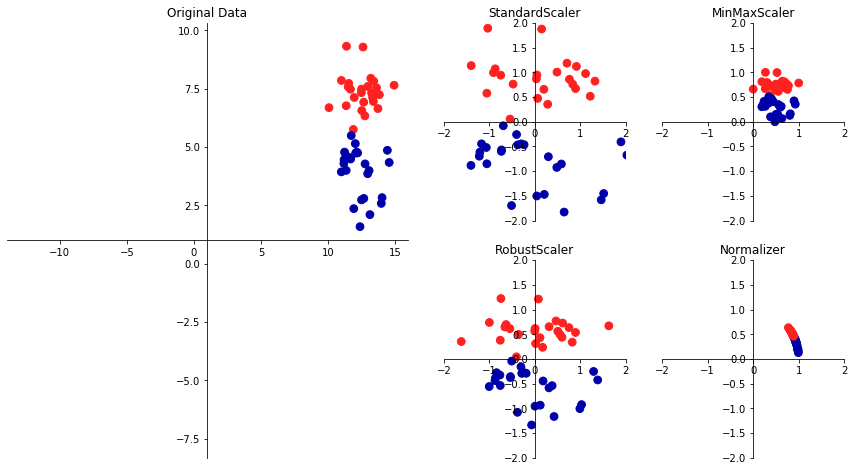

In [3]:
mglearn.plots.plot_scaling()

In [4]:
from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
#訓練データをスケール変換する
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
#データを変換
X_train_scaled = scaler.transform(X_train)
#スケール変換の前後のデータ特性をプリント
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
#テストデータを変換
X_test_scaled = scaler.transform(X_test)
#スケール変換の前後のデータ特性をプリント
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

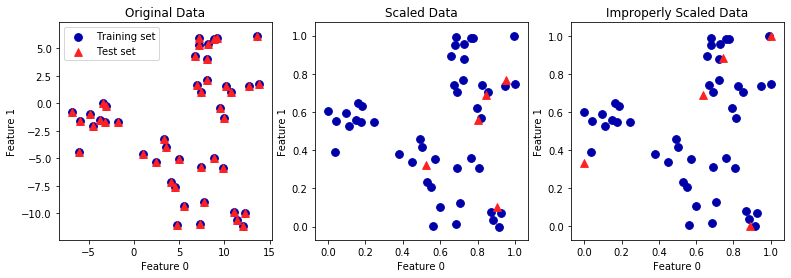

In [15]:
#テストデータにも訓練データの最小値を引いて変換しているから最大最小がぶれている
from sklearn.datasets import make_blobs
#合成データを作成
X,_ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
#分割
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)
#訓練セットとテストセットをプロット
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_train[:,0],X_train[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

#MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[1].set_title("Scaled Data")

#テストセットを訓練セットとは別にスケール変換
#最小値と最大値が0,1になる。ここでは説明のためにわざとやっている。実際はだめ
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#間違ってできたスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="training set",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2(1),label="test set",s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [16]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))

0.9440559440559441


In [17]:
#0-1スケール変換で前処理
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#変換された訓練データで学習
svm.fit(X_train_scaled,y_train)

#変換されたテストセットデータでスコア計算
print(svm.score(X_test_scaled,y_test))

0.965034965034965


In [18]:
#平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#変換された訓練データで学習
svm.fit(X_train,y_train)

#変換されたテストセットでスコア計算
print(svm.score(X_test_scaled,y_test))

0.6293706293706294
